In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                # visualization
import matplotlib.pyplot as plt     # for visualization
from sklearn.preprocessing import LabelEncoder   # for encoding variables
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
train = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/Train.csv")
test = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/Test.csv")
riders = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/Riders.csv")

In [4]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [5]:
# check the size of the train and test data
train.shape

(21201, 29)

In [6]:
# check the size of the train and test data
test.shape

(7068, 25)

In [9]:
# check if there's any missing values for the train and test set
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [8]:
test.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [10]:
# get percentage of missing values for both train and test set

percent_missing = train.isnull().sum()/len(train)*100
percent_missing

Order No                                      0.000000
User Id                                       0.000000
Vehicle Type                                  0.000000
Platform Type                                 0.000000
Personal or Business                          0.000000
Placement - Day of Month                      0.000000
Placement - Weekday (Mo = 1)                  0.000000
Placement - Time                              0.000000
Confirmation - Day of Month                   0.000000
Confirmation - Weekday (Mo = 1)               0.000000
Confirmation - Time                           0.000000
Arrival at Pickup - Day of Month              0.000000
Arrival at Pickup - Weekday (Mo = 1)          0.000000
Arrival at Pickup - Time                      0.000000
Pickup - Day of Month                         0.000000
Pickup - Weekday (Mo = 1)                     0.000000
Pickup - Time                                 0.000000
Arrival at Destination - Day of Month         0.000000
Arrival at

In [11]:
# show percentage of missing values for both train and test set

percent_missing2 = test.isnull().sum()/len(test)*100
percent_missing2

Order No                                 0.000000
User Id                                  0.000000
Vehicle Type                             0.000000
Platform Type                            0.000000
Personal or Business                     0.000000
Placement - Day of Month                 0.000000
Placement - Weekday (Mo = 1)             0.000000
Placement - Time                         0.000000
Confirmation - Day of Month              0.000000
Confirmation - Weekday (Mo = 1)          0.000000
Confirmation - Time                      0.000000
Arrival at Pickup - Day of Month         0.000000
Arrival at Pickup - Weekday (Mo = 1)     0.000000
Arrival at Pickup - Time                 0.000000
Pickup - Day of Month                    0.000000
Pickup - Weekday (Mo = 1)                0.000000
Pickup - Time                            0.000000
Distance (KM)                            0.000000
Temperature                             20.331070
Precipitation in millimeters            97.184493


In [12]:
# we can see that the column "Precipitation in millimeters " contains 97% missing values
# We might consider dropping this column in both train and test set because there's so much missing information

train = train.drop(columns='Precipitation in millimeters')

In [13]:
test = test.drop(columns='Precipitation in millimeters')

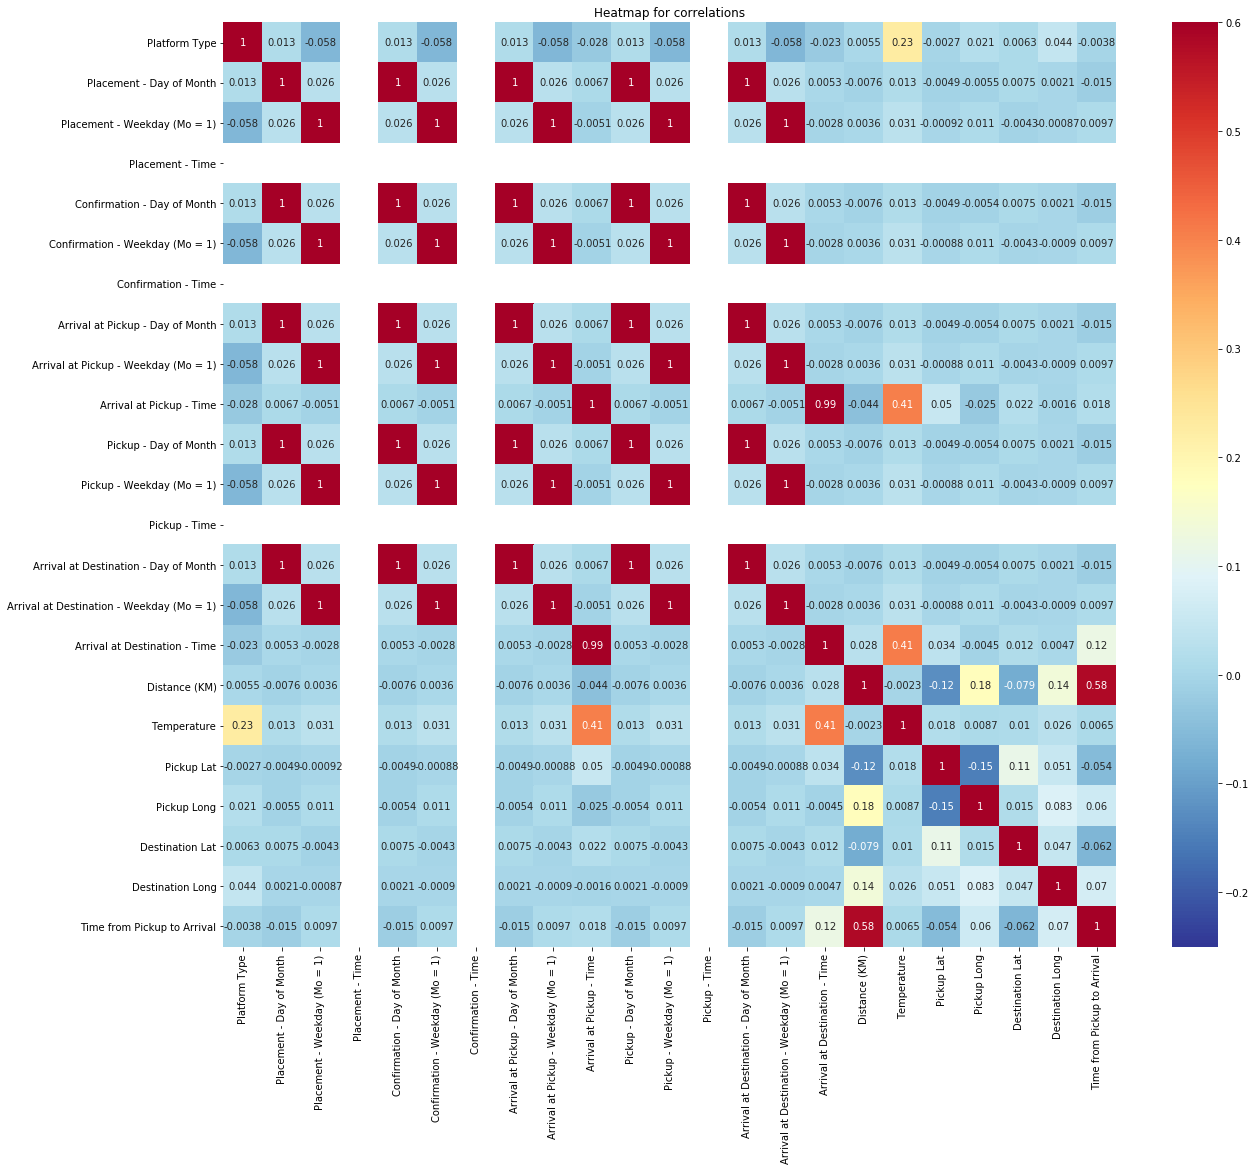

In [121]:
# check the correlation of each predictor variable with the target 'Time from Pickup to Arrival'

plt.figure(figsize=(20,17))

sns.heatmap(train.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Heatmap for correlations');

In [119]:
# It can be noted from the above correlation heatmap that most features have postive correlation with the 
# target variable 'Time from Pickup to Arrival'
# we might wanna include these variables in fitting the model

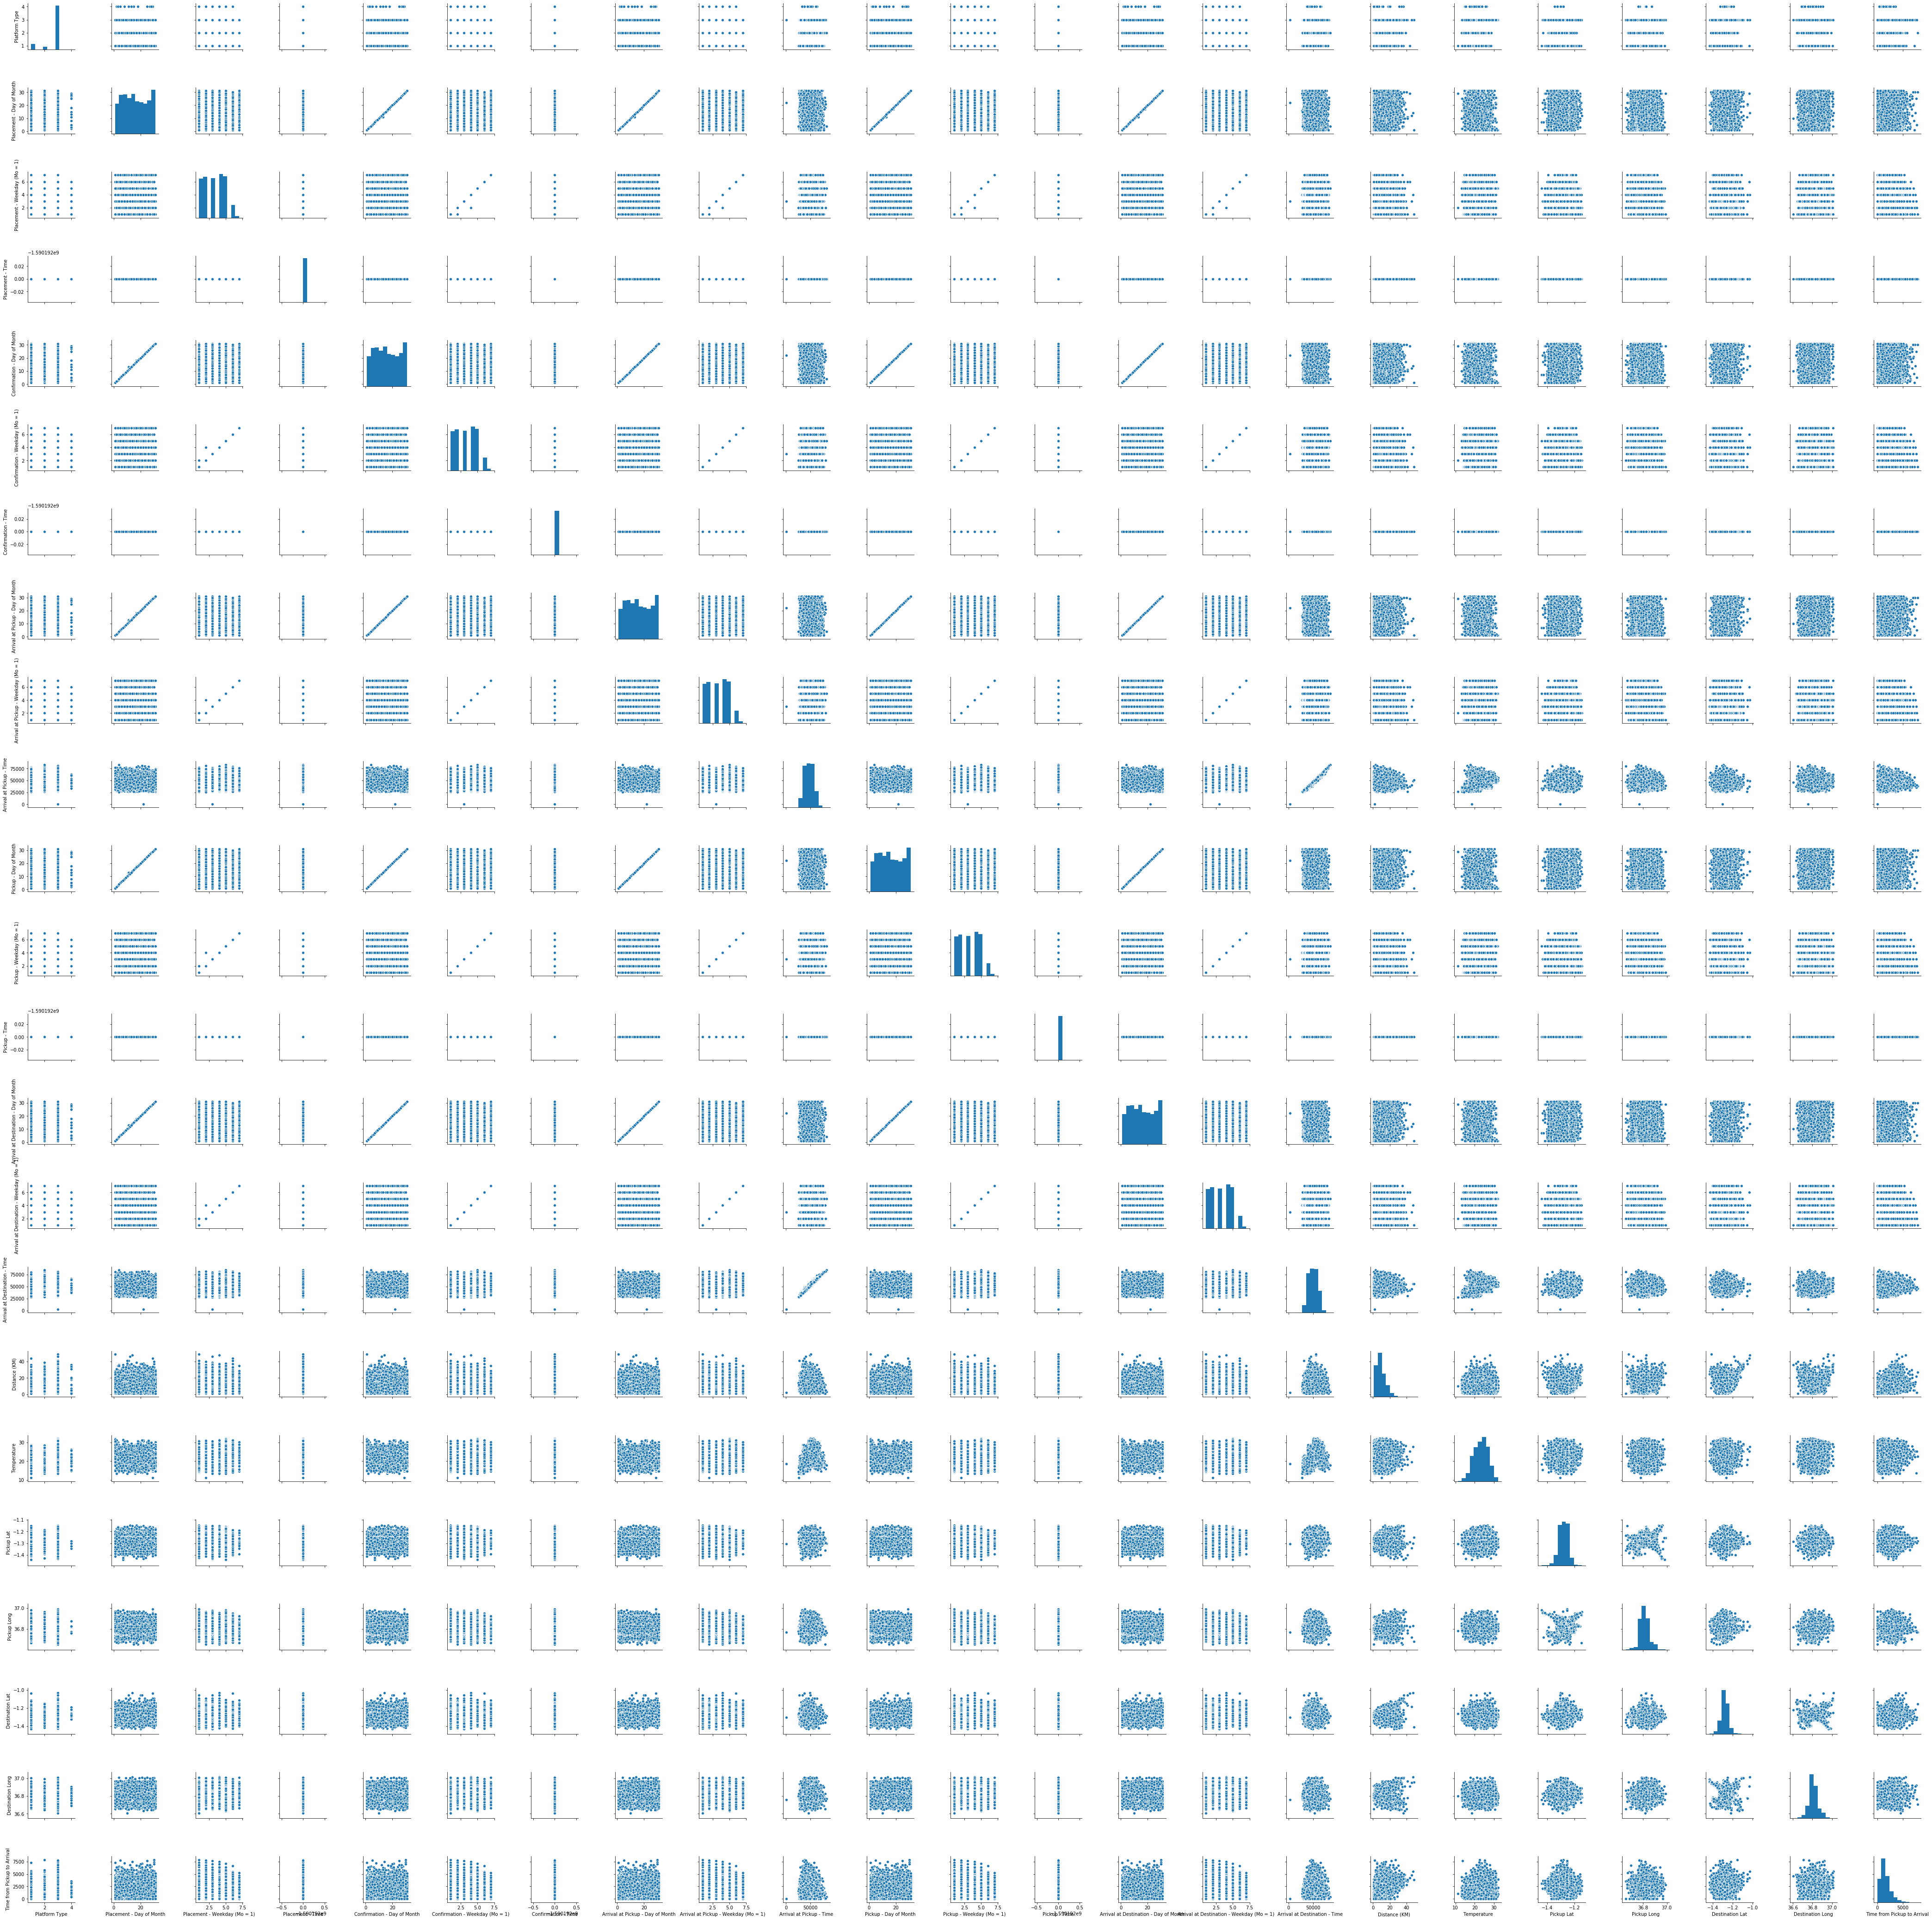

In [122]:
# pariplot for variables to check linear relationships between predictor variables and the target
sns.pairplot(train)

In [17]:
# create functions to calculate delta time for time vairables, calculate bearing and converting time in seconds

def time_from_midnight_in_seconds(dataset, column):
    dataset[column] = pd.to_datetime(dataset[column])
    return (dataset[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')


def delta_time(dataset, higher_time, lower_time):
    return dataset[higher_time] - dataset[lower_time]


def average(list_data):
    return sum(list_data)/len(list_data)+1


def time_to_day_part(time):
    hours = time/3600
    if hours < 6:
        return 'night'
    if hours < 12:
        return 'morning'
    if hours < 18:
        return 'afternoon'
    else:
        return 'evening'


def calculate_bearing(lat1, lng1, lat2, lng2):
    lat1 = np.deg2rad(lat1)
    lat2 = np.deg2rad(lat2)
    diffLong = np.deg2rad(lng2 - lng1)
    x = np.sin(diffLong) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1)
                                       * np.cos(lat2) * np.cos(diffLong))
    
    initial_bearing = np.arctan2(x, y)
    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180° which is not what we want for a compass bearing
    # The solution is to normalize the initial bearing as shown below
    
    initial_bearing = np.rad2deg(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360
    return compass_bearing

In [20]:
# converting time in seconds from midnight for train data

train['Placement - Time'] = time_from_midnight_in_seconds(train, 'Placement - Time')
train['Confirmation - Time'] = time_from_midnight_in_seconds(train, 'Confirmation - Time')
train['Pickup - Time'] = time_from_midnight_in_seconds(train, 'Pickup - Time')
train['Arrival at Pickup - Time'] = time_from_midnight_in_seconds(train, 'Arrival at Pickup - Time')
train['Arrival at Destination - Time'] = time_from_midnight_in_seconds(train, 'Arrival at Destination - Time')

In [21]:
# Do the same as above for test set

test['Placement - Time'] = time_from_midnight_in_seconds(test, 'Placement - Time')
test['Confirmation - Time'] = time_from_midnight_in_seconds(test, 'Confirmation - Time')
test['Pickup - Time'] = time_from_midnight_in_seconds(test, 'Pickup - Time')
test['Arrival at Pickup - Time'] = time_from_midnight_in_seconds(test, 'Arrival at Pickup - Time')


In [23]:
# calculating delta_time for train data. e.g (difference between time order was placed and time order was confirmed by rider)

delta_confirm_place_train = delta_time(train, 'Confirmation - Time', 'Placement - Time')
delta_pick_arr_confirm_train = delta_time(train, 'Arrival at Pickup - Time', 'Confirmation - Time')
delta_pickup_confirm_train = delta_time(train, 'Pickup - Time', 'Arrival at Pickup - Time')
delta_arrival_pickup_train = delta_time(train, 'Arrival at Destination - Time', 'Pickup - Time')
delta_placement_arrival_train = delta_time(train, 'Arrival at Destination - Time', 'Placement - Time')


In [24]:
# calculating delta_time for test data

delta_confirm_place_test = delta_time(test, 'Confirmation - Time', 'Placement - Time')
delta_pick_arr_confirm_test = delta_time(test, 'Arrival at Pickup - Time', 'Confirmation - Time')
delta_pickup_confirm_test = delta_time(test, 'Pickup - Time', 'Arrival at Pickup - Time')

In [143]:
# Now let's merge Riders dataset with train data and test data

train_rider = train.merge(riders, on='Rider Id')
test_rider = test.merge(riders, on='Rider Id')

In [147]:
# drop outliers
train_rider = train_rider[train_rider['Placement - Weekday (Mo = 1)'] == train_rider['Confirmation - Weekday (Mo = 1)']]
train_rider = train_rider[train_rider['Placement - Day of Month'] == train_rider['Confirmation - Day of Month']]


In [148]:
# Rememebr we observed that Temperature is missing 20% data
# Let's impute those missing values for train and test data

train_rider['Temperature'].fillna(train_rider['Temperature'].mean(), inplace=True)
test_rider['Temperature'].fillna(train_rider['Temperature'].mean(), inplace=True)

In [149]:
# label encoding of personal/business column for train data
# converting the labels into numeric form so as to convert it into the machine-readable form

le = LabelEncoder()
train_rider['Personal or Business'] = le.fit_transform(train_rider['Personal or Business'])


In [150]:
# label encoding of personal/business column for test data

le= LabelEncoder()
test_rider['Personal or Business'] = le.fit_transform(test_rider['Personal or Business'])


In [151]:
# one hot encoding of the train 'Platform Type' column
# This is to representat categorical ' Platform Type' variable as binary vector

train_rider['Platform Type'] = train_rider['Platform Type'].astype('category')
train_rider = pd.concat([train_rider.drop(columns=['Platform Type']), pd.get_dummies(train_rider['Platform Type'])], axis=1)


In [152]:
# Do the same as above for Test data

test_rider['Platform Type'] = test_rider['Platform Type'].astype('category')
test_rider= pd.concat([test_rider.drop(columns=['Platform Type']), pd.get_dummies(test_rider['Platform Type'])], axis=1)


In [153]:
# There are redundant columns train and test data
# They shoud be dropped

train_rider.drop(columns=['Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
                                    'Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)',
                                    'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
                                    'Arrival at Destination - Day of Month',
                                    'Arrival at Destination - Weekday (Mo = 1)',
                                    'Vehicle Type', 'Order No',
                                    'User Id', 'Rider Id'
                                    ], inplace=True)

In [154]:
# drop redundant columns test data

test_rider.drop(columns=['Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
                                   'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)',
                                   'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
                                   'Vehicle Type',
                                   'User Id', 'Rider Id'
                                   ], inplace=True)

In [155]:
# check the data

train_rider.head()

,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Distance (KM),Temperature,...,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,1,2,3,4
0,0,9,5,-1.590192e+09,-1.590192e+09,36287.0,-1.590192e+09,38395.0,4,20.4,...,36.829741,745,1637,1309,13.8,549,0,0,1,0
1,1,18,5,-1.590192e+09,-1.590192e+09,58036.0,-1.590192e+09,61303.0,20,24.5,...,36.904295,2886,1637,1309,13.8,549,0,0,1,0
2,0,31,5,-1.590192e+09,-1.590192e+09,48002.0,-1.590192e+09,51403.0,6,24.7,...,36.818206,2615,1637,1309,13.8,549,0,0,1,0
3,1,2,2,-1.590192e+09,-1.590192e+09,27324.0,-1.590192e+09,30512.0,18,15.2,...,36.802061,2986,1637,1309,13.8,549,0,0,1,0
4,1,22,2,-1.590192e+09,-1.590192e+09,39360.0,-1.590192e+09,41182.0,7,19.2,...,36.752427,1602,1637,1309,13.8,549,0,1,0,0


In [156]:
test_rider.head()

,Order No,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Temperature,...,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,1,2,3,4
0,Order_No_19248,0,27,3,60250.0,60269.0,60784.0,61607.0,8,23.258795,...,-1.305249,36.822390,439,1511,13.3,171,0,0,1,0
1,Order_No_2699,1,26,2,53001.0,53236.0,54566.0,55068.0,19,23.258795,...,-1.288435,36.760677,439,1511,13.3,171,1,0,0,0
2,Order_No_21486,0,29,5,42905.0,43092.0,44749.0,44934.0,9,19.700000,...,-1.293393,36.790237,439,1511,13.3,171,0,0,1,0
3,Order_No_19336,0,2,1,33801.0,33824.0,35090.0,36331.0,15,16.400000,...,-1.259542,36.787118,439,1511,13.3,171,0,0,1,0
4,Order_No_20374,0,14,4,46559.0,48164.0,49778.0,49909.0,15,21.300000,...,-1.255189,36.782203,439,1511,13.3,171,0,0,1,0


In [157]:
# Notice the Platform type column has (1,2,3,4) as columns due to one hot encoding
# let's renaming these columns

train_rider.rename(columns={1: "Platform Type 1", 2: "Platform Type 2",
                                      3: "Platform Type 3", 4: "Platform Type 4"}, inplace=True)

test_rider.rename(columns={1: "Platform Type 1", 2: "Platform Type 2",
                                     3: "Platform Type 3", 4: "Platform Type 4"}, inplace=True)

In [158]:
# check the data again

train_rider.head()

,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Distance (KM),Temperature,...,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Platform Type 1,Platform Type 2,Platform Type 3,Platform Type 4
0,0,9,5,-1.590192e+09,-1.590192e+09,36287.0,-1.590192e+09,38395.0,4,20.4,...,36.829741,745,1637,1309,13.8,549,0,0,1,0
1,1,18,5,-1.590192e+09,-1.590192e+09,58036.0,-1.590192e+09,61303.0,20,24.5,...,36.904295,2886,1637,1309,13.8,549,0,0,1,0
2,0,31,5,-1.590192e+09,-1.590192e+09,48002.0,-1.590192e+09,51403.0,6,24.7,...,36.818206,2615,1637,1309,13.8,549,0,0,1,0
3,1,2,2,-1.590192e+09,-1.590192e+09,27324.0,-1.590192e+09,30512.0,18,15.2,...,36.802061,2986,1637,1309,13.8,549,0,0,1,0
4,1,22,2,-1.590192e+09,-1.590192e+09,39360.0,-1.590192e+09,41182.0,7,19.2,...,36.752427,1602,1637,1309,13.8,549,0,1,0,0


In [159]:
test_rider.head()

,Order No,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Temperature,...,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Platform Type 1,Platform Type 2,Platform Type 3,Platform Type 4
0,Order_No_19248,0,27,3,60250.0,60269.0,60784.0,61607.0,8,23.258795,...,-1.305249,36.822390,439,1511,13.3,171,0,0,1,0
1,Order_No_2699,1,26,2,53001.0,53236.0,54566.0,55068.0,19,23.258795,...,-1.288435,36.760677,439,1511,13.3,171,1,0,0,0
2,Order_No_21486,0,29,5,42905.0,43092.0,44749.0,44934.0,9,19.700000,...,-1.293393,36.790237,439,1511,13.3,171,0,0,1,0
3,Order_No_19336,0,2,1,33801.0,33824.0,35090.0,36331.0,15,16.400000,...,-1.259542,36.787118,439,1511,13.3,171,0,0,1,0
4,Order_No_20374,0,14,4,46559.0,48164.0,49778.0,49909.0,15,21.300000,...,-1.255189,36.782203,439,1511,13.3,171,0,0,1,0


In [160]:
# -----------Now it's time to split the data and train Machine Learning models----------
# first import ML algorithms we'll use
# This project is a Regression problem so we'll use Regresion models not Classification models

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [161]:
# First Drop the target variable 'Time from Pickup to Arrival' from train data and stor in in y for splitting purposes

X = train_rider.drop(columns='Time from Pickup to Arrival')
y = train_rider['Time from Pickup to Arrival']


In [162]:
# Split the data using 80/20 split and don't set random state = 100, to select records randomly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [163]:
# check the shape/size of train and test data to confirm data splitting

print (X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(16959, 22) (16959,)
(4240, 22) (4240,)


In [164]:
# Now train Random forest regressor model on X_train and make predictions on X_test and model's accuracy


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print('accuracy:',rf.score(X_test,y_test)*100)

accuracy: 54.07790298237045


In [165]:
# Random Forest Reg Coefficient of Determination 
y_pred2 = rf.predict(X_test)

r2_score(y_test,y_pred2)*100

54.07790298237045

In [166]:
# Linear Regression Model

lm = LinearRegression()
lm.fit(X_train, y_train)
print('accuracy:',lm.score(X_test,y_test)*100)

accuracy: 63.42355820717518


In [167]:
# Linear Reg Coefficient of Determination 

y_pred = lm.predict(X_test)

r2_score(y_test,y_pred)*100

63.42355820717518

In [168]:
# Linear regression performs better than the Random Regressor
# with higher accuracy

In [169]:
# compare the actual and predicted values of the Linear Reg model
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9248,1165,1119.545620
2173,4340,2998.603736
15449,2033,1458.113250
6913,676,772.622556
15148,1193,1282.674217
...,...,...
4852,3547,3097.634058
13980,1800,2102.289206
9042,973,1054.115895
6707,1350,1118.601847


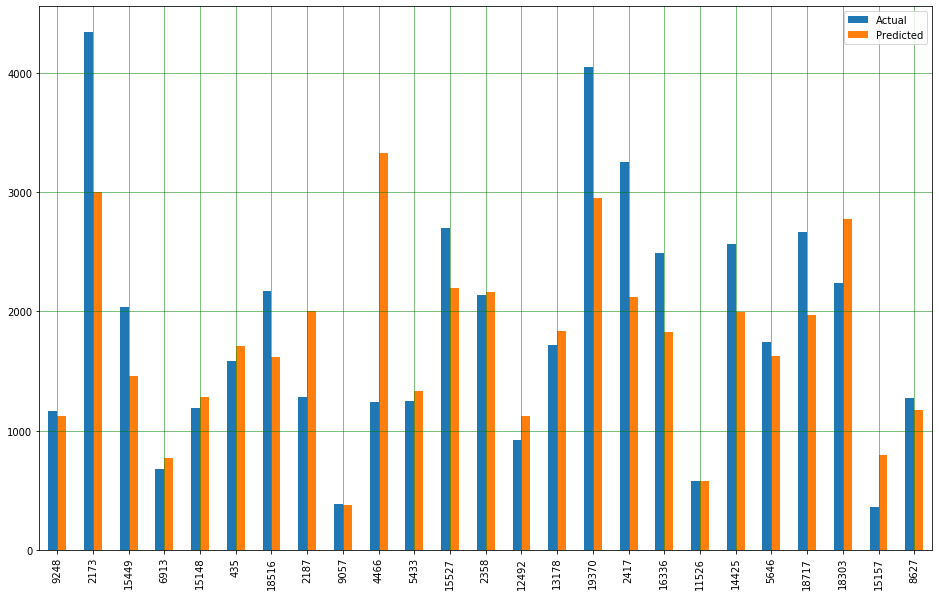

In [170]:
# We can also visualize comparison result as a bar graph 
# Note: As the number of records is huge, for representation purpose we'll take just 25 records

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# --------------------------For Submission----------------------

final_predict = lm.predict(test_rider.drop(columns='Order No'))
test_rider['Time from Pickup to Arrival'] = final_predict

# Exporting the predictions to Excel file to only show 'Order No' and 'Time from Pickup to Arrival'

submission = test_rider[['Order No','Time from Pickup to Arrival' ]]
submission['Time from Pickup to Arrival'] = submission['Time from Pickup to Arrival'].astype(int)
submission.to_csv('C:/Users/mncedisi.mncwabe/Documents/Practices/SiyaSubmission.csv', index=False)